# K-Means Algorithm Implementation
</br>
<b>Overview</b>
<p>The dataset contains all the transactions occurring between 1/12/2010 and 9/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.</p>

Steps:
<li>Fetch Data</li>
<li>Clean Data</li>
<li>Data Preparation</li>
<li>Data Modelling</li>
<li>Model Analysis</li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [2]:
#fetch data

retail_df = pd.read_csv('Online+Retail.csv', sep=',', encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
retail_df.shape

(541909, 8)

In [4]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#clean data

#missing vals
(retail_df.isnull().sum()/len(retail_df))*100 #percent of missing vals

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
#drop rows with missing vals
retail_df = retail_df.dropna()
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Data preparation 

- Recency (R): Number of days since last purchase
- Frequency (F): Number of transactions
- Monetary (M): Total amount of transactions (revenue contributed)

In [7]:
# new column amount
retail_df['amount'] = retail_df['Quantity']* retail_df['UnitPrice']

In [8]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [9]:
# monetary
grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [10]:
# frequency
frequency = retail_df.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [11]:
print(grouped_df['CustomerID'].dtype)
print(frequency['CustomerID'].dtype)
print(grouped_df['CustomerID'].value_counts())
print(frequency['CustomerID'].value_counts())

float64
float64
CustomerID
12346.0    1
16282.0    1
16295.0    1
16293.0    1
16292.0    1
          ..
14321.0    1
14323.0    1
14326.0    1
14327.0    1
18287.0    1
Name: count, Length: 4372, dtype: int64
CustomerID
12346.0    1
16282.0    1
16295.0    1
16293.0    1
16292.0    1
          ..
14321.0    1
14323.0    1
14326.0    1
14327.0    1
18287.0    1
Name: count, Length: 4372, dtype: int64


In [12]:
grouped_df['CustomerID'] = grouped_df['CustomerID'].astype(int)
frequency['CustomerID'] = frequency['CustomerID'].astype(int)

# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,amount,frequency
0,12346,0.00,2
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


In [13]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [14]:
# recency
# how recent last transactions happened (minimum last dates a customer did a transaction)

#convert to datetime
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [15]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [16]:
# compute the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [17]:
#compute the diff
retail_df['diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [18]:
last_purchase = retail_df.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
print(last_purchase['CustomerID'].dtype)
last_purchase['CustomerID'] = last_purchase['CustomerID'].astype(int)
print(last_purchase['CustomerID'].dtype)

float64
int32


In [19]:
#merge the dfs
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'amount', 'frequency', 'recency']
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346,0.00,2,325 days 02:33:00
1,12347,4310.00,182,1 days 20:58:00
2,12348,1797.24,31,74 days 23:37:00
3,12349,1757.55,73,18 days 02:59:00
4,12350,334.40,17,309 days 20:49:00


In [20]:
import datetime as dt
#number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


remove outliers
1. outlier treatment
2. rescaling

<Axes: ylabel='amount'>

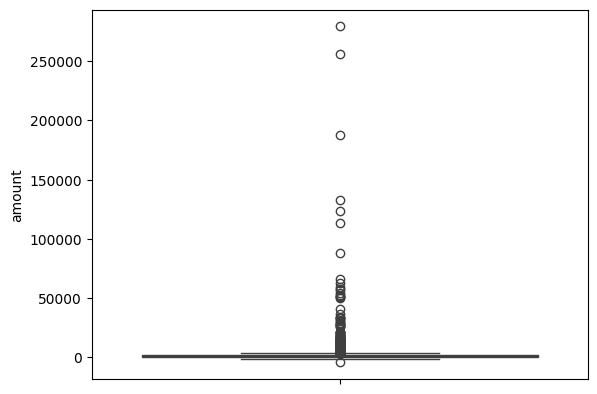

In [21]:
# outlier treatment
sns.boxplot(grouped_df['amount'])

<Axes: ylabel='frequency'>

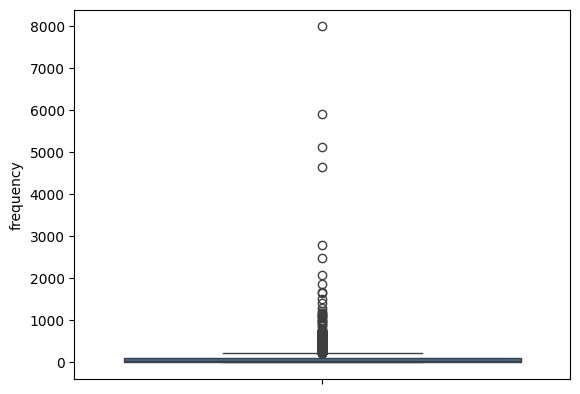

In [22]:
# outlier treatment
sns.boxplot(grouped_df['frequency'])

In [23]:
#removing statistical outliers
Q1 = grouped_df.amount.quantile(0.05) #5th percentile
Q3 = grouped_df.amount.quantile(0.95) #95th percentile
IQR = Q3 - Q1
grouped_df = grouped_df[( grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)] 

Q1 = grouped_df.recency.quantile(0.05) #5th percentile
Q3 = grouped_df.recency.quantile(0.95) #95th percentile
IQR = Q3 - Q1
grouped_df = grouped_df[( grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)] 

Q1 = grouped_df.frequency.quantile(0.05) #5th percentile
Q3 = grouped_df.frequency.quantile(0.95) #95th percentile
IQR = Q3 - Q1
grouped_df = grouped_df[( grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)] 

types of outliers
- statistical
- domain specific

In [24]:
# rescaling 
rfm_df = grouped_df[['amount', 'frequency', 'recency']] 
rfm_df.head()

#instantiate
scaler = StandardScaler()

#fit transformation
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [25]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [26]:
# modelling

# k-means with some arbitrary K
kmeans = KMeans (n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [27]:
kmeans.labels_

array([2, 3, 0, ..., 2, 0, 0])

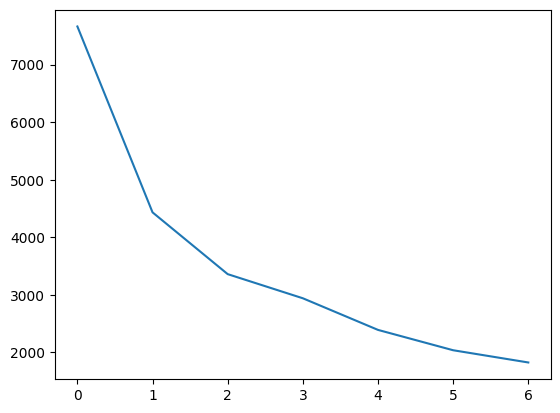

In [28]:
#optimal clusters

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans = KMeans( n_clusters= num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [29]:
# silhouette analysis
range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters= num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)

    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(n_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4085588204735244
For n_clusters=3, the silhouette score is 0.39439948764516547
For n_clusters=4, the silhouette score is 0.4026061774443087
For n_clusters=5, the silhouette score is 0.32850394958407436
For n_clusters=6, the silhouette score is 0.40778084099523626
For n_clusters=7, the silhouette score is 0.4077237881679317
For n_clusters=8, the silhouette score is 0.4017678996579704


In [30]:
# final model

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [31]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [32]:
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346,0.00,2,325,1
1,12347,4310.00,182,1,2
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,1


<Axes: xlabel='cluster_id', ylabel='amount'>

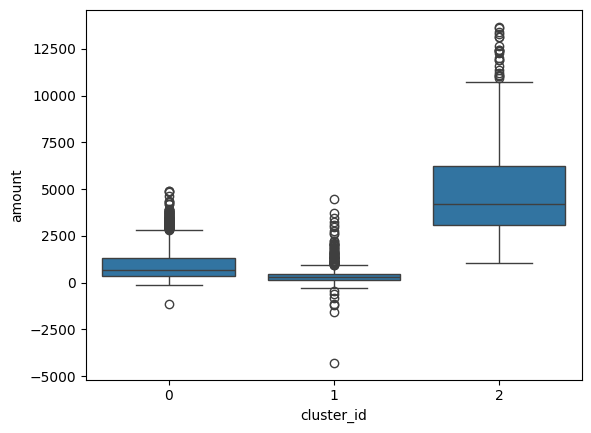

In [33]:
sns.boxplot( x='cluster_id', y='amount', data= grouped_df)

<Axes: xlabel='cluster_id', ylabel='recency'>

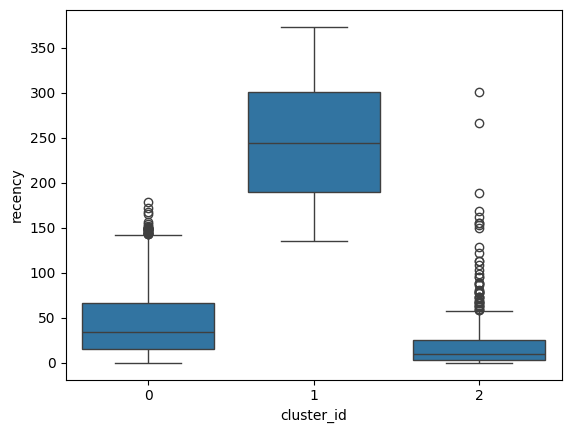

In [34]:
sns.boxplot( x='cluster_id', y='recency', data= grouped_df)

<Axes: xlabel='cluster_id', ylabel='frequency'>

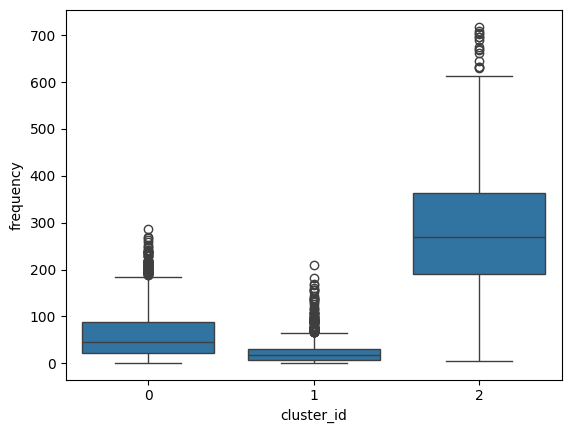

In [35]:
sns.boxplot( x='cluster_id', y='frequency', data= grouped_df)